# Example 6: Counting and measuring freshwater snails

In this example we will use thresholding and watershed algorithms to count freshwater snails, and measure their shape and pigmentation with `compute_shape_features` and `compute_texture_features`.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_6_before.jpg)
    
**Input** - Snails photographed from a camera stand. Variable brightness across the tray and snail clumping are the biggest challenges.
    
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

![After](_figures/project_6_after.jpg)
    
**Results** - After applying adaptive thresholding and a watershed algorithm, the snail separate well from the background. Now we can count them, and measure size, shape and colouration
    
</div>
</div>


## Background

Just like in the example before, segmentation and feature detection are a two-step process. First, a mask is set around tray, the reference is set manually (the detection algorithm only works on reference cards with clear boundaries, and not on "continuous" mm-paper), and then thresholding and watershed algorithm are applied. Remaining overlap is removed with the `edit_contour` tool, and `detect_contour` is used a once more to determine the final specimen contours. 

In the second step, the configuration file is modified to add `compute_shape_featues` and `compute_texture_features`, followed by a "silent run" `feedback=False`. 

For more information regarding this procedure also check in https://www.phenopype.org/gallery/example_5/.

## Preparation

In [2]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "example6"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery-" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

could not retrieve template from online repo
D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery-example6.yaml


In [3]:
proj = pp.Project("project")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project

Project "project" successfully loaded with 2 images
--------------------------------------------


In [4]:
## add the two snail-images from the data folder
proj.add_files(image_dir = r"../../gallery/data", include="snails")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: snails, exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image snails1.jpg - 0__snails1 already exists (overwrite=False)
Found image snails2.jpg - 0__snails2 already exists (overwrite=False)

Found 2 files
--------------------------------------------


In [5]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project\data\0__snails1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project\data\0__snails2\pype_config_v1.yaml (overwritten)


In [6]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"contour": ["a", "b", "c"],
"drawing": ["a"],
"reference": ["a"]
}
updating pype config file


------------+++ new pype iteration 2022-01-16 13:18:05 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)
create_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 4101 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 249 contours that match criteria
detect_contour
- loaded existing annotation of type "c

## Edit config to extract shape features

In [7]:
target1 = """    - measurement:"""
replacement1 = """    - measurement:
        - compute_shape_features
        - compute_texture_features"""

proj.edit_config(tag="v1", target=target1, replacement=replacement1)

# phenopype gallery example 6
# ---------------------------
# count small freshwater snails and separate overlapping specimens

config_info:
    config_name: pype_config_v1.yaml
    date_created: '2022-01-16 13:17:58'
    date_last_modified:
    template_name: gallery-example6.yaml
    template_path: D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery-example6.yaml
processing_steps:
    - preprocessing:
        - create_mask:
            ANNOTATION: {type: mask, id: a, edit: false}
            tool: rectangle
        - create_reference:
            ANNOTATION: {type: reference, id: a, edit: false}
    - segmentation:
        - threshold:
            method: adaptive
            blocksize: 99
            constant: 3
        - detect_contour:
            ANNOTATION: {type: contour, id: a, edit: overwrite}
        - watershed:
            distance_cutoff: 0.7
        - detect_contour:
            ANNOTATION: {type: contour, id: b, edit: overwrite}
            mi

In [8]:
## run image processing with deactivated feedback 
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", feedback=False)
    

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"contour": ["a", "b", "c"],
"drawing": ["a"],
"reference": ["a"]
}
updating pype config file


------------+++ new pype iteration 2022-01-16 13:19:43 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)
create_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 4101 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 249 contours that match criteria
detect_contour
- loaded existing annotation of type "c

Processing gray channel texture features: 100%|█████████████████████████████████████| 120/120 [00:01<00:00, 103.19it/s]




VISUALIZATION
select_canvas
- raw image
draw_contour
draw_mask


EXPORT
save_annotation
- loading existing annotation file
- updating annotation of type "mask" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "reference" with id "a" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "a" to "annotations_v1.json"
updating pype config file


------------+++ finished pype iteration +++--------------
-------(End with Ctrl+Enter or re-run wi

Processing gray channel texture features: 100%|███████████████████████████████████████| 78/78 [00:00<00:00, 124.72it/s]




VISUALIZATION
select_canvas
- raw image
draw_contour
draw_mask


EXPORT
save_annotation
- loading existing annotation file
- updating annotation of type "mask" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "reference" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "a" to "annotations_v1.json"
updating pype config file


------------+++ finished pype iteration +++--------------
-------(End with Ctrl+Enter or re-run wi

In [9]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations", overwrite=True)

Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__snails1
0__snails1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project\results\annotations\0__snails1_annotations_v1.json.
Collected annotations_v1.json from 0__snails2
0__snails2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example6\project\results\annotations\0__snails2_annotations_v1.json.



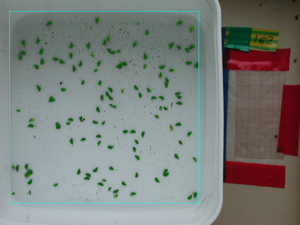
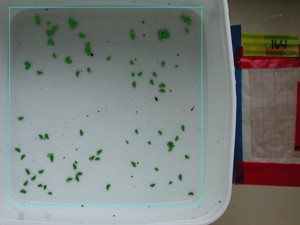


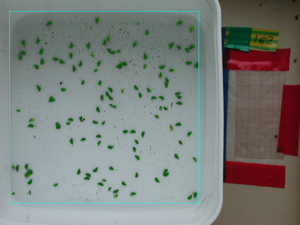
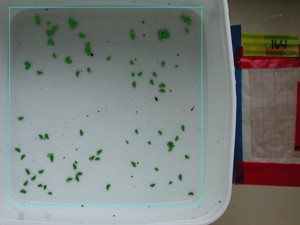

In [10]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)